Vivek Gopalakrishnan

vgopala4@jhu.edu

v715

# 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# Wrangle the data
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
df = df.query("roi == 'Telencephalon_L' or roi == 'Telencephalon_R' or roi == 'CSF'")

# Subset ROI volumes
tel_l = np.array(df.query("roi == 'Telencephalon_L'")[["volume"]]["volume"])
tel_r = np.array(df.query("roi == 'Telencephalon_R'")[["volume"]]["volume"])
csf = np.array(df.query("roi == 'CSF'")[["volume"]].drop_duplicates()["volume"])

# Construct new dataframe
df = pd.DataFrame([tel_l, tel_r, csf]).T
df.columns = ["tel_l", "tel_r", "csf"]

# Validate
df.head()

,tel_l,tel_r,csf
0,531111,543404,109776
1,545603,552216,107334
2,483107,490805,94254
3,558849,568830,67156
4,509945,518902,110114


In [3]:
# Fit the linear model
reg = LinearRegression().fit(X=df[["tel_l", "tel_r"]], y=df["csf"])
reg.coef_

array([ 1.94975321, -1.70030499])

**Interpretation:**

- Holding Right Telencephalon volume constant, a 1 unit increase in Left Telencephalon volume will result in a 1.95 unit increase in CSF volume.
- Holding Left Telencephalon volume constant, a 1 unit increase in Right Telencephalon volume will result in a 1.70 unit decrease in CSF volume.

# 2

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
# Split the dataset (75/25 split)
x_train, x_test = train_test_split(df, test_size=0.25, random_state=0)
y_true = x_test["admit"].values

In [7]:
# Fit the classifier
clf = LogisticRegression(solver="lbfgs").fit(
    x_train[["gre", "gpa", "rank"]], 
    x_train["admit"]
)
clf.coef_

array([[ 0.0015829 ,  0.81641631, -0.65466757]])

**Interpretation:**

- Holding all else constant, a 1 point increase to the GRE score will increase the log-odds of being admitted by 0.00158.
- Holding all else constant, a 1 point increase to the GPA will increase the log-odds of being admitted by 0.816.
- Holding all else constant, a 1 place increase to class rank will decrease the log-odds of being admitted by 0.655.

In [8]:
y_pred = clf.predict_proba(x_test[["gre", "gpa", "rank"]])[:, 1]

In [9]:
def get_metrics(y_pred, y_true, threshold):
    
    # Calculate the confusion matrix
    cf = confusion_matrix(y_pred > threshold, y_true, labels=[True, False])
    
    # Calculate the various metrics
    tp = cf[0, 0]
    fp = cf[0, 1]
    fn = cf[1, 0]
    tn = cf[1, 1]
    
    sens = tp / (tp + fn)
    spec = tn / (fp + tn)
    acc = (tn + tp) / (tp + fp + fn + tn)
    
    return threshold, sens, spec, acc

In [10]:
# Calculate TPR, TNR, and accuracy at varying thresholds
thresholds = np.linspace(0, 1, 100)
metrics = [get_metrics(y_pred, y_true, threshold) for threshold in thresholds]
metrics = pd.DataFrame(metrics, columns=["threshold", "sensitivity", "specificity", "accuracy"])
metrics.head()

,threshold,sensitivity,specificity,accuracy
0,0.000000,1.0,0.0,0.35
1,0.010101,1.0,0.0,0.35
2,0.020202,1.0,0.0,0.35
3,0.030303,1.0,0.0,0.35
4,0.040404,1.0,0.0,0.35


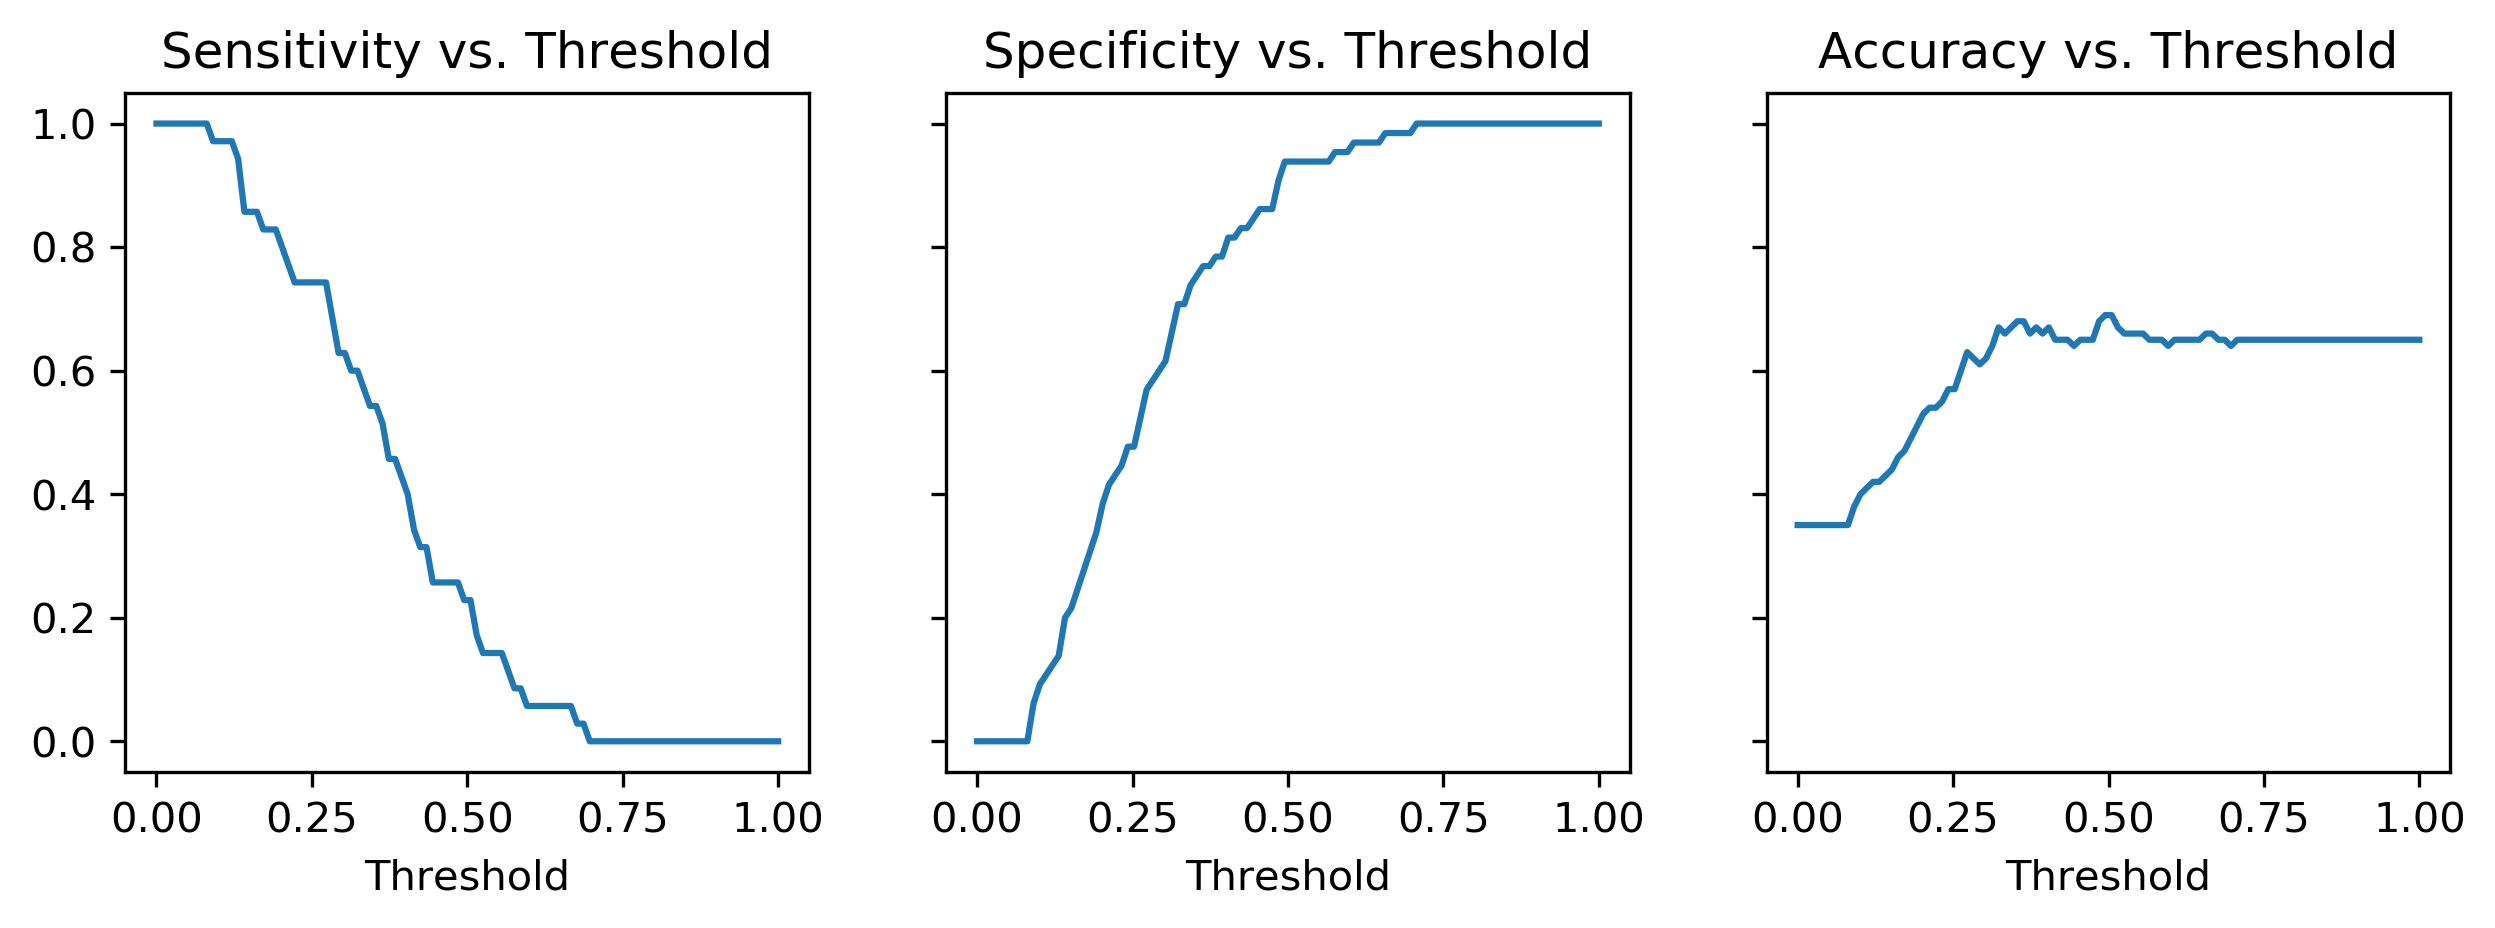

In [11]:
# Plot the results
fig, axs = plt.subplots(ncols=3, sharex=True, sharey=True, 
                        dpi=300, figsize=(10, 3))

axs[0].plot(metrics["threshold"], metrics["sensitivity"])
axs[1].plot(metrics["threshold"], metrics["specificity"])
axs[2].plot(metrics["threshold"], metrics["accuracy"])

axs[0].set(title="Sensitivity vs. Threshold", xlabel="Threshold")
axs[1].set(title="Specificity vs. Threshold", xlabel="Threshold")
axs[2].set(title="Accuracy vs. Threshold", xlabel="Threshold")

plt.show()